In [8]:
from warnings import simplefilter

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from skimage.exposure import rescale_intensity
from skimage.segmentation import active_contour
from skimage.feature import canny
from skimage.morphology import disk, binary_erosion, binary_closing

In [2]:
simplefilter('ignore',lineno=2366)
rcParams['figure.facecolor'] = 'white'

## Image de base

In [3]:
pil_img = Image.open('slice_86.png')
img_tot = np.array(pil_img)
img = img_tot[100:360,40:470].astype('uint16') # 'zoom on patient'
im = rescale_intensity(img,in_range=(0,1400),out_range='uint8')

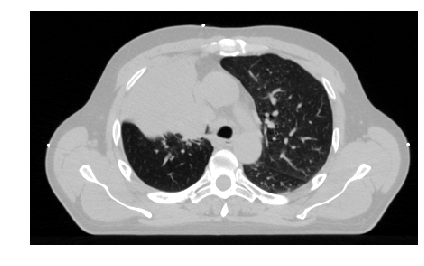

In [4]:
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()

# Contours et segmentations

## Seuillage

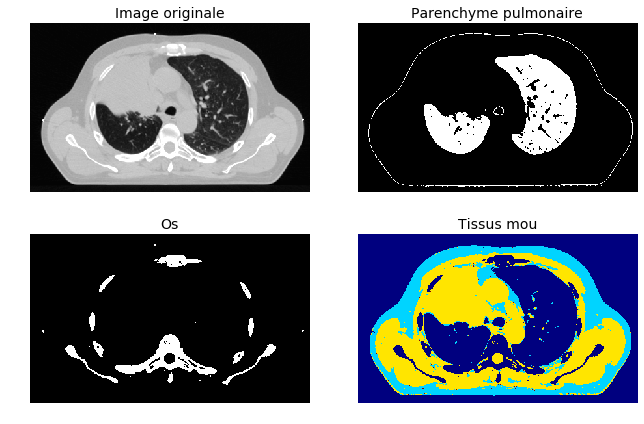

In [9]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(2,2,1)
plt.imshow(img,cmap='gray', vmin=0, vmax=1400)
ax.set_title('Image originale', fontsize=14)
plt.axis('off')

imt = np.ma.masked_inside(img,110,500)
ax = plt.subplot(2,2,2)
plt.imshow(imt.mask,cmap='gray')
ax.set_title('Parenchyme pulmonaire', fontsize=14)
plt.axis('off')

imt = np.ma.masked_inside(img,1120,4000)
ax = plt.subplot(2,2,3)
plt.imshow(imt.mask,cmap='gray')
ax.set_title('Os', fontsize=14)
plt.axis('off')

imt1 = np.ma.masked_inside(img,860,990).mask*10
imt2 = np.ma.masked_inside(img,990,1120).mask*20
ax = plt.subplot(2,2,4)
plt.imshow(imt1+imt2,cmap='jet')
ax.set_title('Tissus mou', fontsize=14)
plt.axis('off')

plt.savefig('output/simple_T.png',transparent=True)
plt.show()

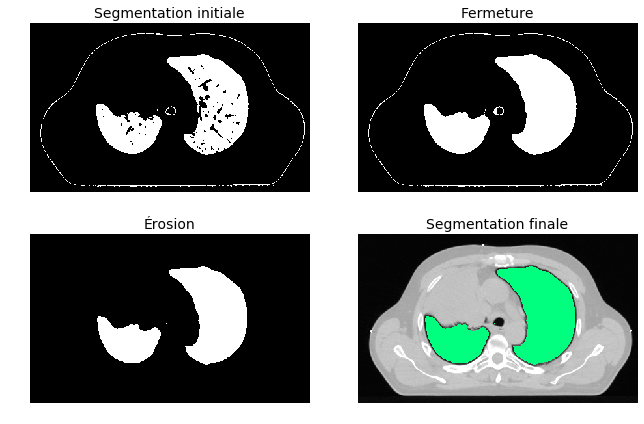

In [11]:
d2 = disk(2)
d3 = disk(5)

fig = plt.figure(figsize=(10,6))

imt = np.ma.masked_inside(img,110,500).mask
ax = plt.subplot(2,2,1)
plt.imshow(imt,cmap='gray')
ax.set_title('Segmentation initiale', fontsize=14)
plt.axis('off')

im_close = binary_closing(imt,d3)
ax = plt.subplot(2,2,2)
plt.imshow(im_close,cmap='gray')
ax.set_title('Fermeture', fontsize=14)
plt.axis('off')

im_erode = binary_erosion(im_close,d2)
ax = plt.subplot(2,2,3)
plt.imshow(im_erode,cmap='gray')
ax.set_title('Érosion', fontsize=14)
plt.axis('off')

masked_data = np.ma.masked_where(im_erode < 0.9, im_erode)
ax = plt.subplot(2,2,4)
plt.imshow(img,cmap='gray',vmin=0,vmax=1400)
plt.imshow(masked_data,cmap='winter',vmin=0,vmax=1.)

ax.set_title('Segmentation finale',fontsize=14)
plt.axis('off')

plt.savefig('output/threshold_post.png',transparent=True)
plt.show()

## Canny

In [6]:
cntrs = canny(im,low_threshold=4,high_threshold=180,sigma=2.5)
masked_data = np.ma.masked_where(cntrs < 0.9, cntrs)

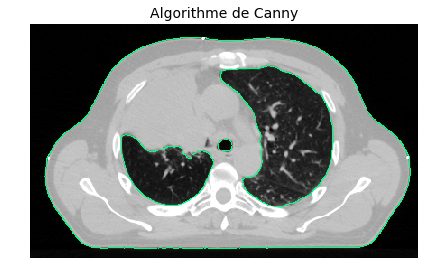

In [7]:
plt.imshow(im,cmap='gray')
plt.imshow(masked_data,cmap='winter',vmin=0,vmax=1)
plt.title('Algorithme de Canny',fontsize=14)
plt.axis('off')
plt.savefig('output/canny.png',dpi=150,transparent=True)
plt.show()

## Serpents

In [12]:
s = np.linspace(0, 2*np.pi, 400)
x = 213 + 8*np.cos(s)
y = 133 + 8*np.sin(s)
crcl = np.array([x, y]).T

# snake = active_contour(im,crcl)
snake = active_contour(im,crcl, alpha=0.015, beta=10, gamma=0.001)

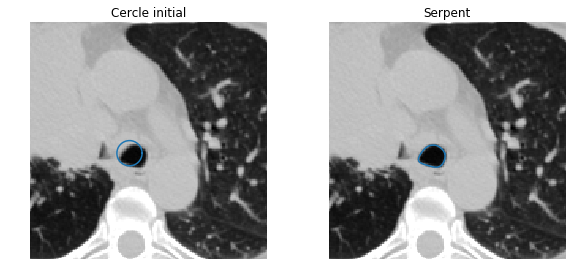

In [13]:
fig = plt.figure(figsize=(10,4))

ax = plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
ax.set_title('Cercle initial', fontsize=12)
plt.plot(crcl[:,0],crcl[:,1])
plt.xlim([150,300])
plt.ylim([200,50])
plt.axis('off')

ax = plt.subplot(1,2,2)
plt.imshow(im,cmap='gray')
ax.set_title('Serpent', fontsize=12)
plt.plot(snake[:,0],snake[:,1])
plt.xlim([150,300])
plt.ylim([200,50])
plt.axis('off')


plt.savefig('output/snake.png',transparent=True)
plt.show()